In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

path = r'C:\Users\xuanx\Desktop\Data Science Project 2\PRSA2017_Data_20130301-20170228\PRSA_Data_20130301-20170228'
all_files = glob.glob(path + '/*.csv')
print(all_files)

maindf = []

for filename in all_files:
    df = pd.read_csv(filename, index_col= 0, header = 0),
    maindf.append(df)
    
print(maindf)

['C:\\Users\\xuanx\\Desktop\\Data Science Project 2\\PRSA2017_Data_20130301-20170228\\PRSA_Data_20130301-20170228\\PRSA_Data_Aotizhongxin_20130301-20170228.csv', 'C:\\Users\\xuanx\\Desktop\\Data Science Project 2\\PRSA2017_Data_20130301-20170228\\PRSA_Data_20130301-20170228\\PRSA_Data_Changping_20130301-20170228.csv', 'C:\\Users\\xuanx\\Desktop\\Data Science Project 2\\PRSA2017_Data_20130301-20170228\\PRSA_Data_20130301-20170228\\PRSA_Data_Dingling_20130301-20170228.csv', 'C:\\Users\\xuanx\\Desktop\\Data Science Project 2\\PRSA2017_Data_20130301-20170228\\PRSA_Data_20130301-20170228\\PRSA_Data_Dongsi_20130301-20170228.csv', 'C:\\Users\\xuanx\\Desktop\\Data Science Project 2\\PRSA2017_Data_20130301-20170228\\PRSA_Data_20130301-20170228\\PRSA_Data_Guanyuan_20130301-20170228.csv', 'C:\\Users\\xuanx\\Desktop\\Data Science Project 2\\PRSA2017_Data_20130301-20170228\\PRSA_Data_20130301-20170228\\PRSA_Data_Gucheng_20130301-20170228.csv', 'C:\\Users\\xuanx\\Desktop\\Data Science Project 2\\PRS

In [2]:
print(len(maindf))
datalist = range(0,12)

fully=[]

for n in datalist:
    full = pd.DataFrame(maindf[n][0])
    fully.append(full)

alldata = pd.concat(fully, ignore_index= True)


12


In [3]:
alldata.isnull().any()

year       False
month      False
day        False
hour       False
PM2.5       True
PM10        True
SO2         True
NO2         True
CO          True
O3          True
TEMP        True
PRES        True
DEWP        True
RAIN        True
wd          True
WSPM        True
station    False
dtype: bool

In [4]:
#rename PM2.5 to replace the '.' so not to interfere with coding
alldata.rename(columns={'PM2.5':'PM2dot5'}, inplace=True)
alldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 17 columns):
year       420768 non-null int64
month      420768 non-null int64
day        420768 non-null int64
hour       420768 non-null int64
PM2dot5    412029 non-null float64
PM10       414319 non-null float64
SO2        411747 non-null float64
NO2        408652 non-null float64
CO         400067 non-null float64
O3         407491 non-null float64
TEMP       420370 non-null float64
PRES       420375 non-null float64
DEWP       420365 non-null float64
RAIN       420378 non-null float64
wd         418946 non-null object
WSPM       420450 non-null float64
station    420768 non-null object
dtypes: float64(11), int64(4), object(2)
memory usage: 54.6+ MB


In [5]:
alldatanull = alldata[alldata.isna().any(axis=1)]
alldatanull
allwdnull = alldata['wd'].isna()
nullnull = alldata[allwdnull]
nullnull

,year,month,day,hour,PM2dot5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
6388,2013,11,22,4,82.0,74.0,15.0,75.0,1300.0,NaN,-3.200,1020.5,-4.0,0.0,NaN,0.1,Aotizhongxin
11718,2014,7,2,6,44.0,44.0,2.0,16.0,800.0,105.0,21.500,998.2,21.5,0.1,NaN,0.2,Aotizhongxin
13412,2014,9,10,20,56.0,141.0,13.0,81.0,700.0,99.0,21.700,1008.0,15.8,0.0,NaN,0.0,Aotizhongxin
16748,2015,1,27,20,26.0,42.0,12.0,78.0,1300.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Aotizhongxin
17263,2015,2,18,7,13.0,14.0,12.0,22.0,600.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420018,2017,1,28,18,257.0,281.0,48.0,75.0,2800.0,8.0,0.625,1016.0,-7.9,0.0,NaN,0.5,Wanshouxigong
420038,2017,1,29,14,13.0,46.0,4.0,6.0,300.0,64.0,-1.220,1025.0,-21.6,0.0,NaN,6.5,Wanshouxigong
420264,2017,2,8,0,104.0,113.0,17.0,87.0,1900.0,2.0,-2.800,1026.3,-7.0,0.0,NaN,0.2,Wanshouxigong
420342,2017,2,11,6,10.0,15.0,7.0,56.0,800.0,17.0,-4.600,1025.0,-18.1,0.0,NaN,0.2,Wanshouxigong


In [6]:
# Percentage of entries containing null values. 9.17% of values contain NaN
(38600/420768)

0.09173701422161382

In [7]:
#Fill Null values (numerical readings) with average value of column
listall = range(4,14)
for i in listall:
    columnname = alldata.columns[i]
    colmean = alldata[alldata.columns[i]].mean()
    alldata[alldata.columns[i]].fillna(value = colmean, inplace = True)
    
alldata = alldata.dropna(subset=['wd'])
#alldata['WSPM'].fillna(value = alldata['WSPM'].mean(), inplace = True)


In [8]:
alldatanull1 = alldata[alldata.isna().any(axis=1)]
alldatanull1
alldata.isna().any()

year       False
month      False
day        False
hour       False
PM2dot5    False
PM10       False
SO2        False
NO2        False
CO         False
O3         False
TEMP       False
PRES       False
DEWP       False
RAIN       False
wd         False
WSPM       False
station    False
dtype: bool

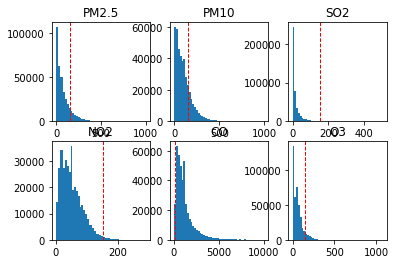

In [9]:
#Graph of all graphs histograms 
graphs = plt.figure()

#histogram PM2.5
plt.subplot(231)
plt.hist(alldata.PM2dot5, bins = 50,
        range = (alldata.PM2dot5.min(), alldata.PM2dot5.max()))
plt.axvline(151, color = 'r', linestyle = 'dashed', linewidth = 1)
plt.title('PM2.5')

#histogram PM10 
plt.subplot(232)
plt.hist(alldata.PM10, bins = 50,
        range = (alldata.PM10.min(), alldata.PM10.max()))
plt.axvline(151, color = 'r', linestyle = 'dashed', linewidth = 1)
plt.title('PM10')

#histogram SO2
plt.subplot(233)
plt.hist(alldata.SO2, bins = 50,
        range = (alldata.SO2.min(), alldata.SO2.max()))
plt.axvline(151, color = 'r', linestyle = 'dashed', linewidth = 1)
plt.title('SO2')

#histogram NO2
plt.subplot(234)
plt.hist(alldata.NO2, bins = 50,
        range = (alldata.NO2.min(), alldata.NO2.max()))
plt.axvline(151, color = 'r', linestyle = 'dashed', linewidth = 1)
plt.title('NO2')

#histogram CO
plt.subplot(235)
plt.hist(alldata.CO, bins = 50, 
        range = (alldata.CO.min(), alldata.CO.max()))
plt.axvline(151, color = 'r', linestyle = 'dashed', linewidth = 1)
plt.title('CO')

#histogram O3
plt.subplot(236)
plt.hist(alldata.O3, bins = 50,
        range = (alldata.O3.min(), alldata.O3.max()))
plt.axvline(151, color = 'r', linestyle = 'dashed', linewidth = 1)
plt.title('O3')
plt.show()

In [10]:
#for line in range(0, len(alldata)):

alldata.loc[(alldata['PM2dot5'] < 55.5), 'pm25lvl'] = 'breathable'
alldata.loc[(alldata['PM2dot5'] >= 55.5) & (alldata['PM2dot5'] <= 150.4), 'pm25lvl'] = 'unhealthy'
alldata.loc[(alldata['PM2dot5'] >= 150.5) & (alldata['PM2dot5'] <= 250.4), 'pm25lvl'] = 'veryunhealthy'
alldata.loc[(alldata['PM2dot5'] > 250.4), 'pm25lvl'] = 'hazardous'

alldata.loc[(alldata['PM10'] < 255), 'pm10lvl'] = 'breathable'
alldata.loc[(alldata['PM10'] >= 255) & (alldata['PM10'] <= 354), 'pm10lvl'] = 'unhealthy'
alldata.loc[(alldata['PM10'] >= 355) & (alldata['PM10'] <= 424), 'pm10lvl'] = 'veryunhealthy'
alldata.loc[(alldata['PM10'] > 424), 'pm10lvl'] = 'hazardous'

alldata.loc[(alldata['SO2'] < 186), 'SO2lvl'] = 'breathable'
alldata.loc[(alldata['SO2'] >= 186) & (alldata['SO2'] <= 304), 'SO2lvl'] = 'unhealthy'
alldata.loc[(alldata['SO2'] >= 305) & (alldata['SO2'] <= 604), 'SO2lvl'] = 'veryunhealthy'
alldata.loc[(alldata['SO2'] > 604), 'SO2lvl'] = 'hazardous'

alldata.loc[(alldata['NO2'] < 361), 'NO2lvl'] = 'breathable'
alldata.loc[(alldata['NO2'] >= 361) & (alldata['NO2'] <= 649), 'NO2lvl'] = 'unhealthy'
alldata.loc[(alldata['NO2'] >= 650) & (alldata['NO2'] <= 1244), 'NO2lvl'] = 'veryunhealthy'
alldata.loc[(alldata['NO2'] > 1244), 'NO2lvl'] = 'hazardous'

alldata.loc[(alldata['CO'] < 12.5), 'COlvl'] = 'breathable'
alldata.loc[(alldata['CO'] >= 12.5) & (alldata['CO'] <= 15.4), 'COlvl'] = 'unhealthy'
alldata.loc[(alldata['CO'] >= 15.5) & (alldata['CO'] <= 30.4), 'COlvl'] = 'veryunhealthy'
alldata.loc[(alldata['CO'] > 30.4), 'COlvl'] = 'hazardous'

alldata.loc[(alldata['O3'] < 165), 'O3lvl'] = 'breathable'
alldata.loc[(alldata['O3'] >= 165) & (alldata['O3'] <= 204), 'O3lvl'] = 'unhealthy'
alldata.loc[(alldata['O3'] >= 205) & (alldata['O3'] <= 404), 'O3lvl'] = 'veryunhealthy'
alldata.loc[(alldata['O3'] > 404), 'O3lvl'] = 'hazardous'


In [11]:
print(alldata)

        year  month  day  hour  PM2dot5  PM10   SO2   NO2     CO    O3  ...  \
0       2013      3    1     0      4.0   4.0   4.0   7.0  300.0  77.0  ...   
1       2013      3    1     1      8.0   8.0   4.0   7.0  300.0  77.0  ...   
2       2013      3    1     2      7.0   7.0   5.0  10.0  300.0  73.0  ...   
3       2013      3    1     3      6.0   6.0  11.0  11.0  300.0  72.0  ...   
4       2013      3    1     4      3.0   3.0  12.0  12.0  300.0  72.0  ...   
...      ...    ...  ...   ...      ...   ...   ...   ...    ...   ...  ...   
420763  2017      2   28    19     11.0  32.0   3.0  24.0  400.0  72.0  ...   
420764  2017      2   28    20     13.0  32.0   3.0  41.0  500.0  50.0  ...   
420765  2017      2   28    21     14.0  28.0   4.0  38.0  500.0  54.0  ...   
420766  2017      2   28    22     12.0  23.0   4.0  30.0  400.0  59.0  ...   
420767  2017      2   28    23     13.0  19.0   4.0  38.0  600.0  49.0  ...   

        RAIN   wd  WSPM        station     pm25lvl 

In [46]:
#Remove the CO level datas, as every data column is hazardous. 
print(len(alldata))
alldata['COlvl'].value_counts()


418946


hazardous    418946
Name: COlvl, dtype: int64

In [13]:
alldata.loc[(alldata['pm25lvl'] != 'breathable')|
            (alldata['pm10lvl'] != 'breathable')|
            (alldata['SO2lvl'] != 'breathable') |
            (alldata['NO2lvl'] != 'breathable') |
            (alldata['O3lvl'] != 'breathable'), 'is_pollution'
           ] = 1

In [14]:
alldata['is_pollution'].fillna(value = 0, inplace = True)

In [15]:
alldata['is_pollution'].value_counts()
alldata['is_pollution'].isnull().value_counts()

False    418946
Name: is_pollution, dtype: int64

In [16]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [17]:
#split data into test variables and target variable
test_vars = alldata.filter(['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM'], axis = 1)
test_vars
target_var = alldata['is_pollution']

In [18]:
#normalize data 
min_max_scaler = preprocessing.MinMaxScaler()
X_var_scale = min_max_scaler.fit_transform(test_vars)

In [19]:
#train test split data 
X_train, X_test, y_train, y_test = train_test_split(X_var_scale, target_var, 
                                                    test_size = 0.30)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5)

In [20]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


model = Sequential([
    Dense(32, activation = 'relu', input_shape=(5,)),
    Dense(32, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

hist = model.fit(X_train, y_train, 
                batch_size = 10, 
                epochs = 150,
                validation_data = (X_val, y_val))

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#split test train groups
X_train, X_test, y_train, y_test = train_test_split(test_vars, target_var,
                                                   test_size = 0.3, 
                                                    random_state = 42)
clf = RandomForestClassifier(random_state = 42)

parameters = {
    'n_estimators': [100, 500, 1000, 1500],
    'max_depth' : [3, 5, 10, 20]
}

cv_clf = GridSearchCV(estimator=clf, param_grid=parameters, cv = 5)
results = cv_clf.fit(test_vars, target_var)
results1 = results.cv_results_

results1 = pd.DataFrame(results1)
print(results1)

from sklearn import metrics 

clf_best = RandomForestClassifier(n_estimators = 1000,
                                 max_depth = 20,
                                 random_state = 42)

train = clf_best.fit(X_train, y_train)
y_predicted = clf_best.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_predicted)
print('Random Forest has an accuracy of: %.3f' % accuracy)

y_pred_proba = clf_best.predict_proba(X_test)[:,1]

auc = metrics.roc_auc_score(y_test, y_pred_proba)

fpr_clf, tpr_clf, _ = metrics.roc_curve(y_test, y_pred_proba)

plt.plot(fpr_clf, tpr_clf, label = 'ROC Curve (AUC = %.3f)' % auc)
plt.legend(loc = 'lower right')
plt.show()

In [22]:
o3_target = alldata['O3']

from sklearn.ensemble import RandomForestRegressor

o3_target = alldata['O3']

rfr = RandomForestRegressor(random_state=42)

rfr_parameters = {
    'n_estimators' : [100, 500, 1000, 1500],
    'max_depth' : [3, 5, 10, 20]
}

rfr_cv = GridSearchCV(estimator=rfr, 
                      param_grid= rfr_parameters,
                     cv = 5)

rfr_results = rfr_cv.fit(test_vars, o3_target)
rfr_results1 = rfr_results.cv_results_

print(rfr_results1)


In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 


X_train, X_test, y_train, y_test = train_test_split(test_vars, o3_target,
                                                   test_size = 0.3, 
                                                    random_state = 42)

rfr_best = RandomForestRegressor(n_estimators = 1500,
                                max_depth = 20,
                                random_state = 42)

rfr_results = rfr_best.fit(X_train, y_train)
y_predicted = rfr_best.predict(X_test)
accuracy_best = metrics.accuracy_score(y_test, y_predicted)
print('Random Forest has an accuracy of: %.3f' % accuracy_best)

C:\Users\xuanx\Miniconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


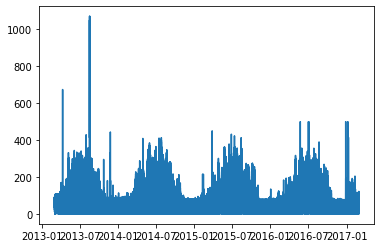

In [24]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter 

alldata['date'] = pd.to_datetime(alldata[['year','month','day','hour']])
alldata.index = alldata.date
timeseries_o3 = alldata.iloc[:,9]
plt.plot(timeseries_o3)


In [25]:
timeseries = alldata
timeseries['date'] = pd.to_datetime(alldata[['year','month','day','hour']])
timeseries.set_index(['date','station'], inplace = True) 

timeseries = alldata.drop(['year','month','day','hour','wd', 'pm25lvl', 
                           'pm10lvl', 'SO2lvl', 'NO2lvl','COlvl', 'O3lvl', 
                           'is_pollution'], axis = 1)
timeseries.info()
print(timeseries)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 418946 entries, (2013-03-01 00:00:00, Aotizhongxin) to (2017-02-28 23:00:00, Wanshouxigong)
Data columns (total 11 columns):
PM2dot5    418946 non-null float64
PM10       418946 non-null float64
SO2        418946 non-null float64
NO2        418946 non-null float64
CO         418946 non-null float64
O3         418946 non-null float64
TEMP       418946 non-null float64
PRES       418946 non-null float64
DEWP       418946 non-null float64
RAIN       418946 non-null float64
WSPM       418946 non-null float64
dtypes: float64(11)
memory usage: 37.4+ MB
                                   PM2dot5  PM10   SO2   NO2     CO    O3  \
date                station                                                 
2013-03-01 00:00:00 Aotizhongxin       4.0   4.0   4.0   7.0  300.0  77.0   
2013-03-01 01:00:00 Aotizhongxin       8.0   8.0   4.0   7.0  300.0  77.0   
2013-03-01 02:00:00 Aotizhongxin       7.0   7.0   5.0  10.0  300.0  73.0   
2013-03-01 0

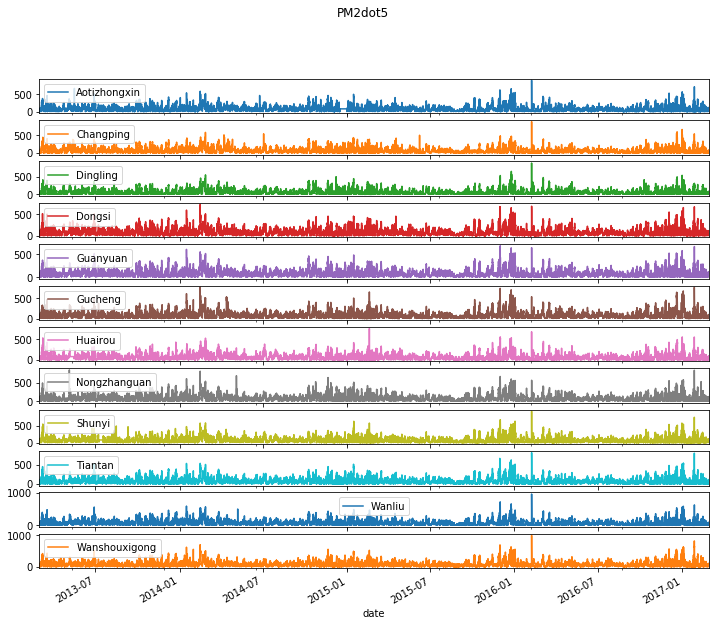

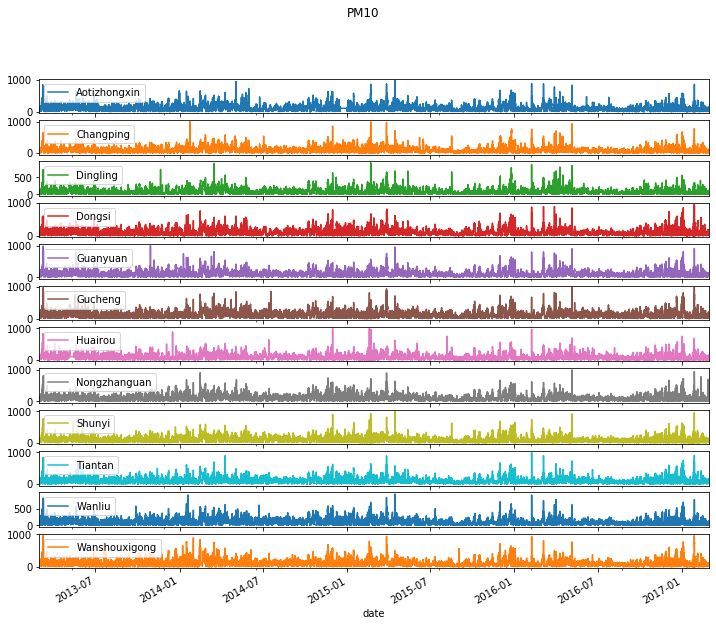

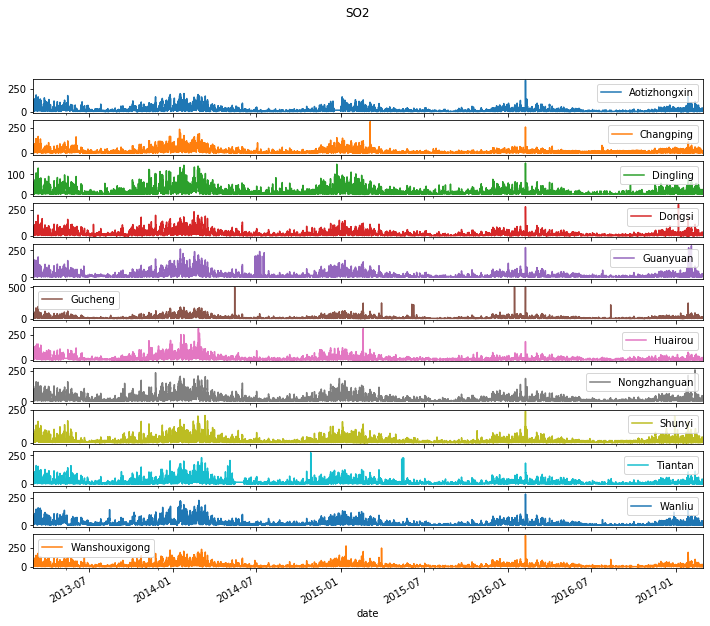

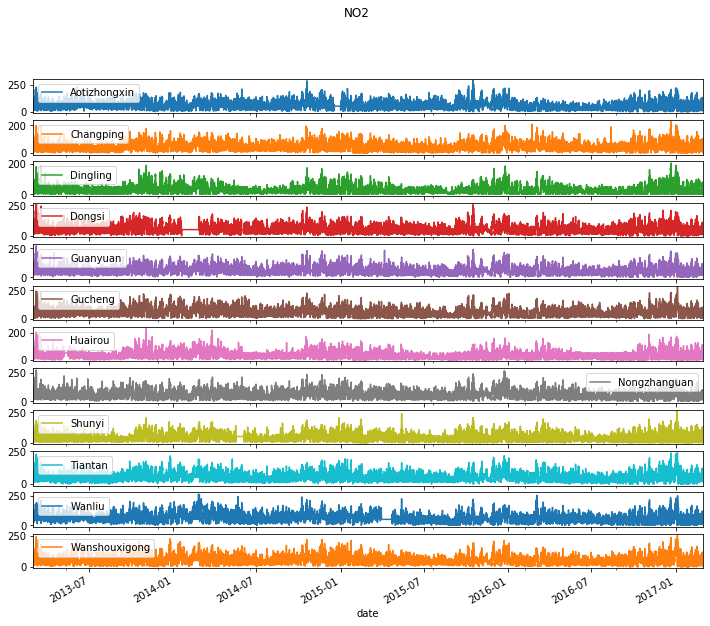

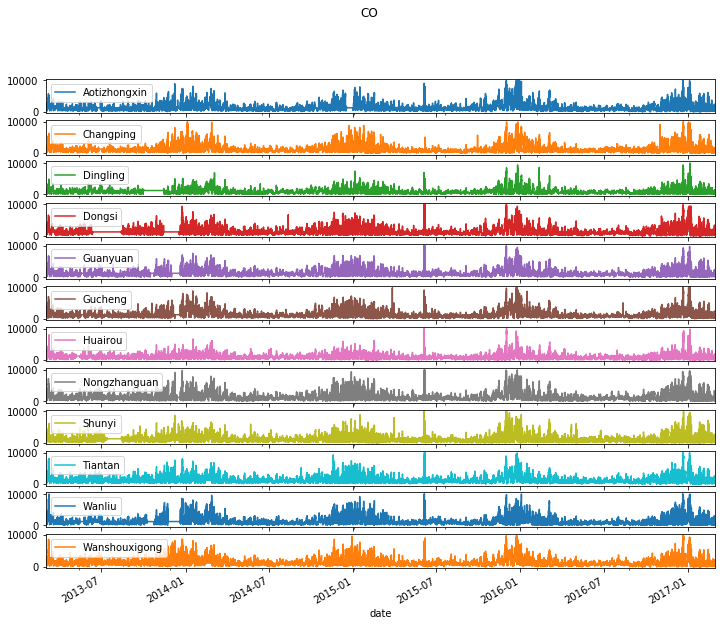

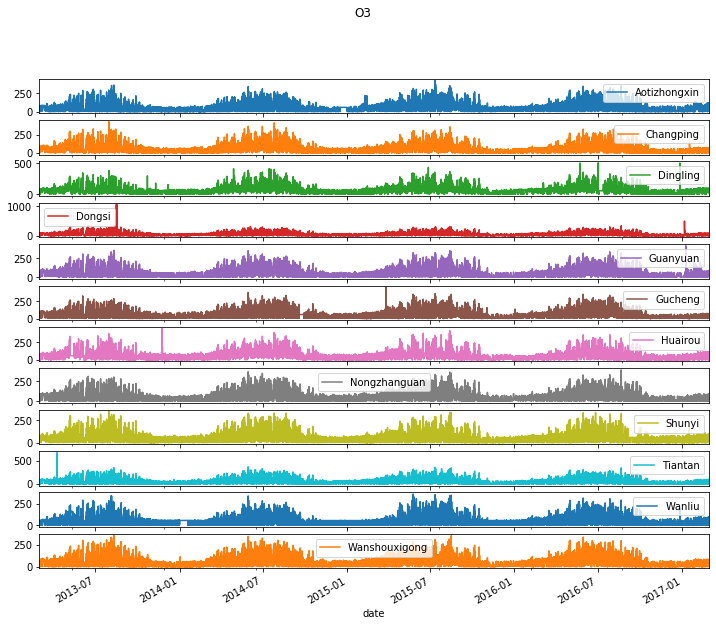

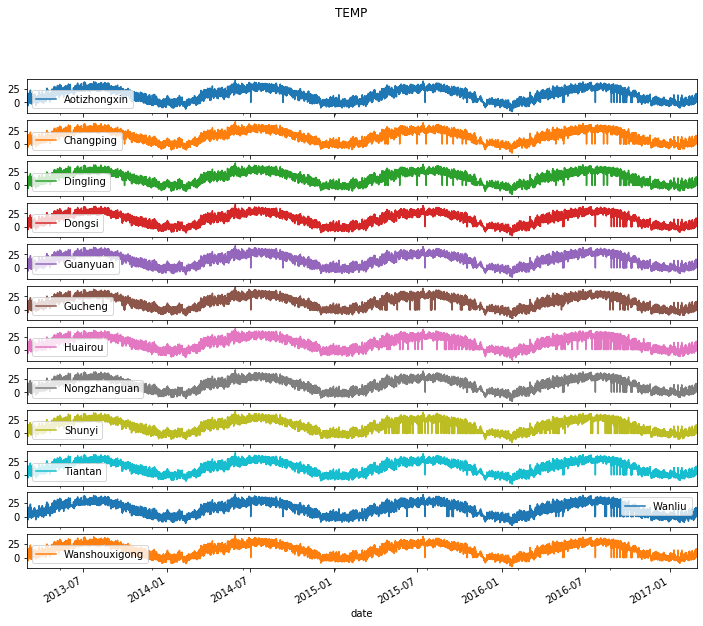

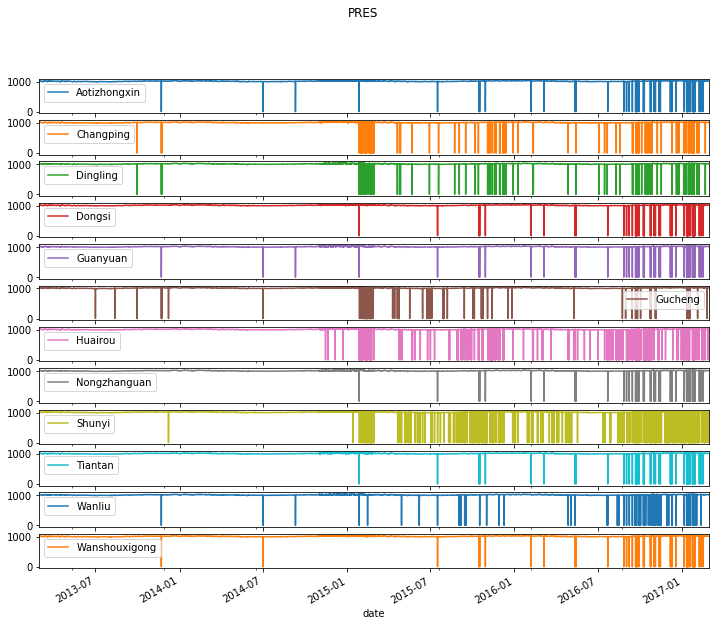

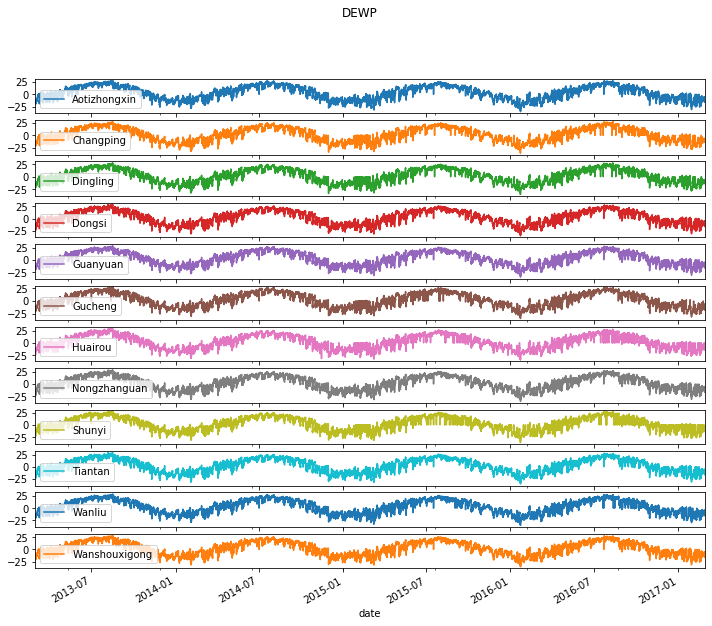

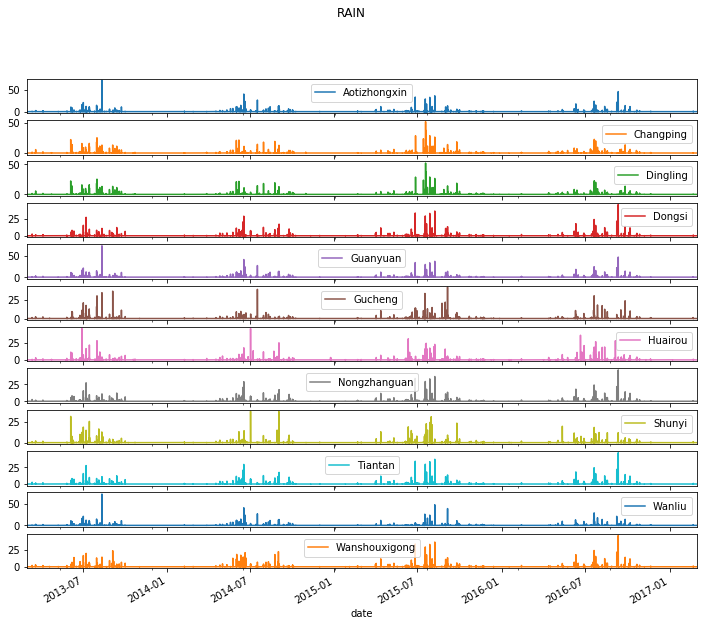

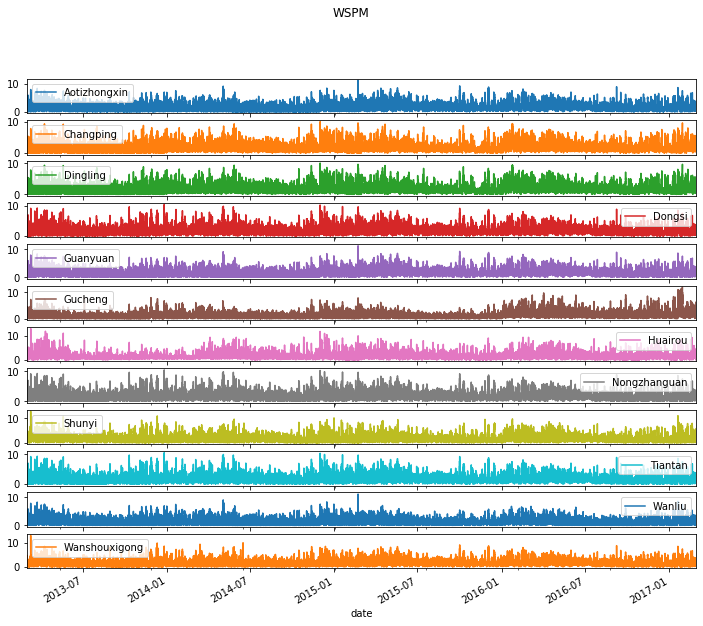

In [74]:
for i, (j, col) in enumerate(timeseries.iteritems()):
    col.unstack(fill_value = 0).plot(subplots = True, title = j, figsize = (12, 10))

In [151]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen


,,year,month,day,hour,PM2dot5,PM10,SO2,NO2,CO,O3,...,RAIN,wd,WSPM,pm25lvl,pm10lvl,SO2lvl,NO2lvl,COlvl,O3lvl,is_pollution
date,station,,,,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,Aotizhongxin,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,...,0.0,NNW,4.4,breathable,breathable,breathable,breathable,hazardous,breathable,0.0
2013-03-01 01:00:00,Aotizhongxin,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,...,0.0,N,4.7,breathable,breathable,breathable,breathable,hazardous,breathable,0.0
2013-03-01 02:00:00,Aotizhongxin,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,...,0.0,NNW,5.6,breathable,breathable,breathable,breathable,hazardous,breathable,0.0
2013-03-01 03:00:00,Aotizhongxin,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,...,0.0,NW,3.1,breathable,breathable,breathable,breathable,hazardous,breathable,0.0
2013-03-01 04:00:00,Aotizhongxin,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,...,0.0,N,2.0,breathable,breathable,breathable,breathable,hazardous,breathable,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,Wanshouxigong,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,...,0.0,NW,2.4,breathable,breathable,breathable,breathable,hazardous,breathable,0.0
2017-02-28 20:00:00,Wanshouxigong,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,...,0.0,WNW,0.9,breathable,breathable,breathable,breathable,hazardous,breathable,0.0
2017-02-28 21:00:00,Wanshouxigong,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,...,0.0,NW,1.1,breathable,breathable,breathable,breathable,hazardous,breathable,0.0


In [185]:
from statsmodels.tsa.api import VAR

model = VAR(timeseries)
result = model.fit(1)
print(result.aic)

38.044074524097006
